1. Abstract Method
2. Abstract class 
3. Interface 
4. Public,Private and Protected Members 
5. _str__() method 
6. Difference between str() and repr() functions
7. Small Banking Application

# 1. Abstract Method:
- Sometimes we don't know about implementation,still we can declare a method. Such type of methods are called abstract methods.i.e abstract method has only declaration but not implementation. 
- In python we can declare abstract method by using @abstractmethod decorator as follows.

In [1]:
from abc import *

class Vehicle:
    @abstractmethod
    def power_wheels(self):         # without knowing the type of vehicle how can we say that it is two power wheels or 4x4
        pass

- @abstractmethod decorator present in abc module. Hence compulsory we should import abc module,otherwise we will get <b>NameError: name 'abstractmethod' is not defined</b>
- abc==>abstract base class module

In [2]:
from abc import *

class Fruit:
    @abstractmethod
    def taste(self):
        pass

<b>NOTE: Child classes are responsible to provide implemention for parent class abstract methods.</b><br>

#### what happens when we provide the implementation in parent class ?
 -  we won't get any error it is consider as dummy implementation.

# 2. Abstract class:
- Some times implementation of a class is not complete,such type of partially implementation classes are called abstract classes. 
- Every abstract class in Python should be derived from ABC class which is present in abc module.

In [3]:
from abc import *
class Test:
    pass

t = Test()

- In the above code we can create object for Test class b'z it is concrete class and it does not conatin any abstract method.

In [4]:
from abc import *
class Test(ABC):
    pass

t = Test()

- In the above code we can create object,even it is derived from ABC class,b'z it does not contain any abstract method

In [5]:
from abc import *
class Test(ABC):
    @abstractmethod
    def m1(self):
        pass

#t = Test()           

-  TypeError: Can't instantiate abstract class Test with abstract methods m1

In [6]:
from abc import *
class Test:
    @abstractmethod
    def m1(self):
        pass

t = Test()          

- We can create object even class contains abstract method b'z we are not extending ABC class.

In [7]:
from abc import *
class Test:
    @abstractmethod
    def m1(self):
        print("hello")

t = Test() 
t.m1()

hello


- Conclusion: If a class contains atleast one abstract method and if we are extending ABC class then instantiation is not possible.
- "abstract class with abstract method instantiation is not possible"
- Parent class abstract methods should be implemented in the child classes. otherwise we cannot instantiate child class.If we are not creating child class object then we won't get any error.

#### Abstract class and Abstract method:
- abstract class can contain any number of abstract methods including zero number also
- abstract class contain normal methods also

#### When object creation is not possible
- if class is abstract and it contains atleast one abstract method then only instation is not possible`

#### Case1: it is valid beaccuse we are not creating child class oject 

In [3]:
from abc import *

class Vehicle(ABC):
    
    @abstractmethod
    def noOfWheels(self):
        pass
    
class Bus(Vehicle):
    pass

#### Case-2:TypeError: Can't instantiate abstract class Bus with abstract methods noOfWheels

In [5]:
from abc import *

class Vehicle(ABC):
    
    @abstractmethod
    def noOfWheels(self):
        pass
    
class Bus(Vehicle):
    pass

#b = Bus()

#### Note: If we are extending abstract class and does not override its abstract method then child class is also abstract and instantiation is not possible.

In [11]:
from abc import *

class Vehicle(ABC):
    
    @abstractmethod
    def noOfWheels(self):
        pass
    
class Bus(Vehicle):
    def noOfWheels(self):
        return 7
    
class Scooter(Vehicle):
    def noOfWheels(self):
        return 2

b = Bus()
print(b.noOfWheels())

s = Scooter()
print(s.noOfWheels())

7
2


#### Note: Abstract class can contain both abstract and non-abstract methods also.

#### Q.) what is the advantage of taking abstract method in parent class?
- complusory we should have to provide the implementation for abstract method in child class

In [14]:
from abc import *

class Vehicle(ABC):
    
    @abstractmethod
    def noOfWheels(self):
        pass
    
class Bus(Vehicle):
    pass
    
class Volvo(Bus):
    def noOfWheels(self):
        return 8
    
#b = Bus()      #TypeError: Can't instantiate abstract class Bus with abstract methods noOfWheels
v = Volvo()
v.noOfWheels()

8

In [16]:
from abc import *

class P(ABC):
    
    @abstractmethod
    def m1(self):pass
    
    @abstractmethod
    def m2(self):pass
    
class C(P):
    def m1(self):
        print("m1 implementation")
        
#c=C()
#c.m1()   #TypeError: Can't instantiate abstract class C with abstract methods m2

In [17]:
from abc import *

class P(ABC):
    
    @abstractmethod
    def m1(self):pass
    
    @abstractmethod
    def m2(self):pass
    
class C(P):
    def m1(self):
        print("m1 implementation")

class CC(C):
    def m2(self):
        print("m2 implementation")
        
c=CC()
c.m1()   
c.m2()

m1 implementation
m2 implementation


In [18]:
from abc import *

class P(ABC):
    
    @abstractmethod
    def m1(self):pass
    
    def m2(self):
        print("M2 implementation")
        
class C(P):
    def m1(self):
        print("M1 Implementaiton")
        
c = C()
c.m1()
c.m2()

M1 Implementaiton
M2 implementation


# 3. Interface
- In general if an abstract class contains only abstract methods such type of abstract class is considered as interface.

#### Diff between abstract class and Interface
- Abstract class contains both abstract and concrete methods
- interface contains only abstract methods

#### Example: we want to construct a building of 1000 floors
- Plan                              --> Interface
- After 1 years 200 floors completed --> Abstract class(partially completed)
- after 3 years 1000 floors completed --> Concrete class(fully completed)

In [6]:
from abc import *

class DBInterface(ABC):
    
    @abstractmethod
    def connect(self):pass
    
    @abstractmethod
    def disconnect(self):pass
    
class Oracle(DBInterface):
    
    def connect(self):
        print("Connecting to Oracle DB")
    def disconnect(self):
        print("Disconnecting to Oracle DB")
        
class Mysql(DBInterface):
    
    def connect(self):
        print("Connecting to Mysql DB")
    def disconnect(self):
        print("Disconnecting to Mysql DB")
        
#o = Oracle()
#o.connect()
#o.disconnect()

db = input("Enter DB name:")
classname = globals()[db]
x = classname()
x.connect()
x.disconnect()

Enter DB name:Oracle
Connecting to Oracle DB
Disconnecting to Oracle DB


#### Note: The inbuilt function globals()[str] converts the string 'str' into a class name and returns the classname.

### Inteface vs  Abstract Class vs Concreate class:
- If we dont know anything about implementation just we have requirement specification then we should go for interface.(<b>only Abstract methods</b>) 
- If we are talking about implementation but not completely then we should go for abstract class.(partially implemented class)(<b>both abstract and concrete methods</b>)
- If we are talking about implementation completely and ready to provide service then we should go for concrete class.(<b>only concrete methods</b>)

In [8]:
from abc import *

class University(ABC):                       # Interface
    
    @abstractmethod
    def collegeName(self):pass
    
    @abstractmethod
    def branch(self):pass
    
    @abstractmethod
    def student(self):pass
    
class College(University):                  # Abstract class
    def collegeName(self):
        print("VIT")
        
    def branch(self):
        print("Mechanical")
        
class Details(College):
    def student(self):
        print("student name")
        
d = Details()
d.collegeName()
d.branch()
d.student()

VIT
Mechanical
student name


### Public, Protected and Private Attributes:

- By default every attribute is public. We can access from anywhere either within the class or from outside of the class.
- Ex: name = "pawan"

- Protected attributes can be accessed within the class anywhere but from outside of the class only in child classes. We can specify an attribute as protected by prefexing with _ symbol.
- But is is just convention and in reality does not exists protected attributes.
- Ex: _name = "pawan"

- private attributes can be accessed only within the class.i.e from outside of the class we cannot access. We can declare a variable as private explicitly by prefexing with 2 underscore symbols.
- Ex: __name = "pawan"

In [11]:
class Test:
    x = 10
    _y = 20
    __Z = 30
    
    def m1(self):
        print(Test.x)
        print(Test._y)
        print(Test.__z)
        
t = Test()
#t.m1()

### How to access private variables from outside of the class:
- We cannot access private variables directly from outside of the class. But we can access indirectly as follows

In [17]:
class Test:
    __x = 10
    def __init__(self):
        self.__y = 20
        
t = Test()
print(t._Test__y)
print(t._Test__x)
print(Test._Test__x)

20
10
10


###__str__() method:
- Whenever we are printing any object reference internally __str__() method will be called which is returns string in the following format

In [22]:
class Student:
    def __init__(self,name, rollno):
        self.name = name
        self.rollno = rollno
        
    #def __str__(self):
        #return "the student name:{} and rollno:{}".format(self.name,self.rollno)
    
s1 = Student("pawan",21)
s2 = Student("kumar",22)

print(s1)
print(s2)

### Diff between str() and repr()

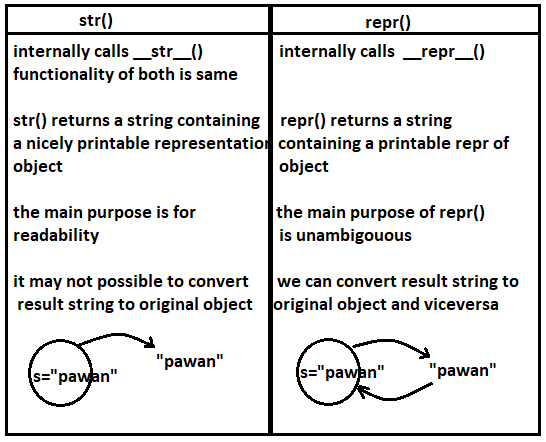

In [23]:
from IPython.display import Image
Image("E:/code/1.PythonOfficial/img/abs1.png")

In [27]:
import datetime

asof = datetime.datetime.now()
s = str(asof)           #  converting date obj to str
print(s)
#d = eval(s)             #  converting str obj to datetime

2021-02-19 18:57:32.790084


In [33]:
import datetime

asof = datetime.datetime.now()
s = repr(asof)
print(s)

d = eval(s)
print(d)

datetime.datetime(2021, 2, 19, 18, 59, 2, 851394)
2021-02-19 18:59:02.851394


### Note: It is recommended to use repr() instead of str()